# Capacités numériques

## Redressement simple alternance

Cet exercice est basé sur la résolution d'équations stationnaires dont la méthode est proposée [ici](https://pcsi3physiquestan.github.io/capacites_numeriques/equation_stationnaire.html). __On fera l'activité correspondate avant de se lancer dans cet exercice et on utilisera directement la fonction `scipy.optimize.bisect` pour résoudre une équation.__

On considère un générateur de tension modélisé par un modèle de Thévenin composé d'une f.e.m. de tension $E$ et d'une résistance de sortie $R = 50 \rm{\Omega}$. Il est relié à une diode $D$ dont la relation intensité tension est:

$$
i = I_s\left(\exp \left(\frac{u_D}{V_D}\right) - 1\right)
$$

avec $I_s = 95 \rm{\mu A}$ et $V_D = 30 \rm{mV}$

```{figure} ./images/diode.png
:name: label_image
:align: center
:width: 150px
Titre
```

> __Point de fonctionnement__ :  
> 1. Justifier que si l'on trace les caractéristiques statiques de la diode et du générateur de Thévenin, l'intersection des deux courbes donne l'intensité circulant dans le circuit et la tension aux bornes des deux dipôles en régime indépendant du temps. On précisera notamment les conventions choisies pour tracer chaque caractéristique. On appelle ce point, le point de fonctionnement du circuit.
> 2. Déterminer graphiquement le point de fonctionnement pour $E < 0$ puis pour $E$ supérieur à $V_D$.
> 3. Montrer, dans le cas général que la tension $u$ aux bornes du générateur doit, à un instant $t$ doit vérifier l'équation suivante:

$$
I_s\left(\exp \left(\frac{u}{V_D}\right) - 1\right) - \frac{E - u}{R} = 0
$$

> 4. On note $f$ la fonction précédente précédente dont $u$ doit être racine. Tracer $u$ pour $E = 1 \rm{V}$ sur un intervalle où $f$ s'annule et estimer graphiquement la valeur de $u$.
> 5. Utiliser la fonction `bisect` pour trouver $u$ lorsque $E = 1 \rm{V}$.

```{dropdown} Réponses aux questions théoriques
1. et 2. Les deux dipôles $\{E+RS\}$ et $D$ étant branchés ensemble, l'intensité qui circule est la même dans les deux dipoles et la tension $u$ sera la même __à condition de prendre l'un en convention générateur et l'autre en convention récepteur.__ On prendra le générateur de Thévenin en convention générateur et la diode en convention récepteur. On cherche alors l'intersection entre une droite décroissante et une exponentielle.
* Quand $E < 0$, l'intersection est proche de $i=0$ (diode bloquée est assimilable à un interrupteur ouvert)
* Quand $E > V_D$, l'intersection est proche de $u = V_D$ (diode passante assimilable à une fem $V_D$)
3. On égalise les deux expressions des intensités données par l'équation de la diode et celle du générateur de Thévenin.
```

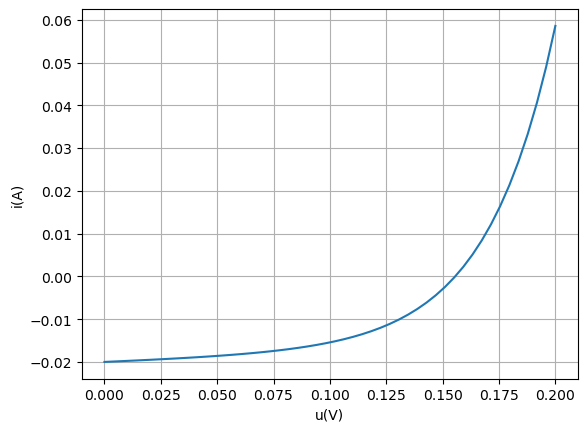

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

E = 1

def f(u):
    global E # Car E va changer ensuite
    Is = 95e-6
    VD = 30e-3
    R = 50
    return Is * (np.exp(u / VD) - 1) - (E - u) / R
  
"""Tracé de f entre 0 et 0.2"""
u = np.linspace(0, 0.2)
fig, ax = plt.subplots()
ax.set_xlabel('u(V)')
ax.set_ylabel('i(A)')
ax.plot(u, f(u))
ax.grid()
plt.show()

In [2]:
"""Détermination de la racine"""
u_fonc = bisect(f, 0, 2)
print(u_fonc)

0.15558332601176517


> __Redressement monoalternance :__  
On suppose maintenant que $E(t)$ est une tension sinusoïdale:

$$
E(t) = E_0 \cos 2 \pi f t
$$
avec $E_0 = 2\rm{V}$ et $f = 50\rm{Hz}$.

> 1. Même si $E$ varie, pourquoi $u$ est toujours racine de $f$ à chaque instant $t$ ?
> 2. Ecrire une fonction `Esource(t:float) -> float` qui renvoie la valeur de $E(t)$ et, si ce n'est pas déjà fait une fonction `f(u:float) -> float` qui renvoie $f(u)$ (on prendra la valeur $E_{instantanee} = E(t)$ comme une valeur globale pour la fonction `f`)`.
> 3. Créer un vecteur $E_k$ contenant les 1000 valeurs $E(t_k)$ aux instants $t_k$ équirépartis sur 2 périodes de $E$.
> 4. Pour chaque valeur $E_k$, déterminer la tension $u_k$ et l'intensité $i_k$ correspondant au point de fonctionnement du circuit et stocker ces valeurs dans deux listes. Transformer ensuite ces listes en des vecteurs.
> 5. Tracer $u_R(t)= R i(t)$ grâce aux résultats précédents puis lui superposer $E(t)$. Pourquoi parle-t-on de redressement monoalternance ?

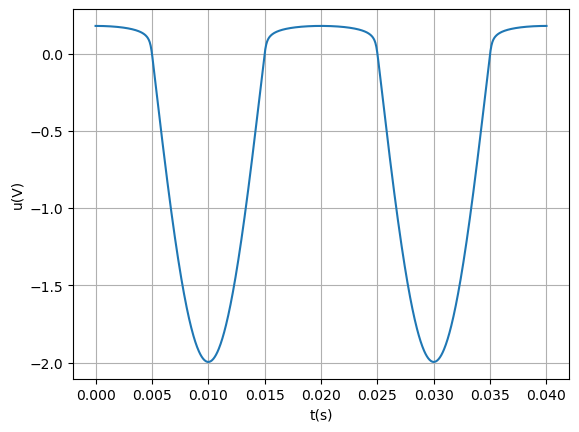

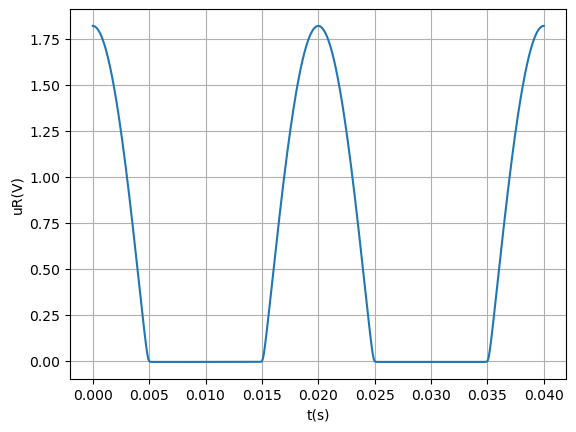

In [3]:
def Esource(t):
    E0 = 2
    freq = 50
    return E0 * np.cos(2 * np.pi * freq * t)

def iThevenin(u):
    """Pour obtenir i à partir de u"""
    R = 50
    return (E - u) / R

N = 1000
freq = 50
R = 50
tk = np.linspace(0, 2 / freq, N)  # tk sur deux périodes
Ek = Esource(tk)

uk = []
ik = []
for E in Ek:
    uk.append(bisect(f, -3, 3))  # Recherche de uk sur intervalle plus grande à cause des valeurs négatives de E
    ik.append(iThevenin(uk[-1]))  # Calcul des ik

"""Tracé (non demandé) de uk(tk)"""
fig1, ax = plt.subplots()
ax.set_xlabel('t(s)')
ax.set_ylabel('u(V)')
ax.plot(tk, uk)
ax.grid()

"""Tracé de ik(tk)"""

fig2, ax = plt.subplots()
ax.set_xlabel('t(s)')
ax.set_ylabel('uR(V)')
ax.plot(tk, R * np.array(ik))  # On doit transformer la liste ik en vecteur numpy pour pouvoir multiplier simplement chaque terme par R
ax.grid()